# Выявление закономерностей, определяющих успешность игры в интернет-магазине

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Описание данных

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Изучение данных из файла

In [1]:
# Импорт библиотек
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
df = pd.read_csv('/datasets/games.csv', sep=',')

In [3]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Вывод

- В таблице 11 колонок и 16715 строк;
- 2 типа данных: дробные числа, строковые;
- Необходимо привести к правильному типу столбец 'Year of Release';
- Нужно привести названия столбцов к нижнему регистру;
- Присутствуют пропуски;

## Предобработка данных

### Замена названия столбцов

In [5]:
# Приводим к нижнему регистру
df.columns = df.columns.str.lower()
print(df.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


### Обработка пропусков

Пропусков в столбцах 'name' и 'genre' всего 2, можно удалить.

In [6]:
df = df.dropna(subset=['name', 'genre'])

Пропуски в 'year_of_release' составляют 1,61% (100 - (16446*100/16713)), это не повлияет на анализ, можно удалить. Возможная причина пропусков - это старые игры и дата выхода игры не известна.

In [7]:
df = df.dropna(subset=['year_of_release'])

Заменим тип данных в столбце 'year_of_release' на числовой, потому что год не может быть дробным числом.

In [8]:
df['year_of_release'] = df['year_of_release'].astype('int64')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


Разберем пропуски в столбце user_score. Аббревиатура tbd значит to be determined, то есть данные были специально не заполнены. Получается это пропуск, заменим его на NaN.

In [10]:
df['user_score'] = df['user_score'].replace('tbd', 'NaN')

In [11]:
df['user_score'].unique() # проверяем результат

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'NaN', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Заменим тип данных в столбце 'user_score' на дробный, потому что там дробные числа, а не строки.

In [12]:
df['user_score'] = df['user_score'].astype('float64')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Пропуски поля rating заменим на unknown. Возможно игра не набрала рейтингов, из-за этого пусто.

In [14]:
df['rating'] = df['rating'].fillna('unknown')

Заполнять пропуски в critic_score, user_score будет некорректно.

In [15]:
# Проверка дубликатов по всем полям
df.duplicated().sum()

0

In [16]:
# Проверка дубликатов по *имя-консоль-год* 
df[['name','platform', 'year_of_release']].duplicated().sum()

1

In [17]:
df = df.drop_duplicates(subset=['name','platform', 'year_of_release'], keep=False)

### Cуммарные продажи во всех регионах

Создим отдельный столбец, в котором будут суммарные продажи во всех регионах (Северной Америке, Европе, Японии).

In [18]:
df['sum_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [19]:
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown,28.31


## Исследовательский анализ данных

### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

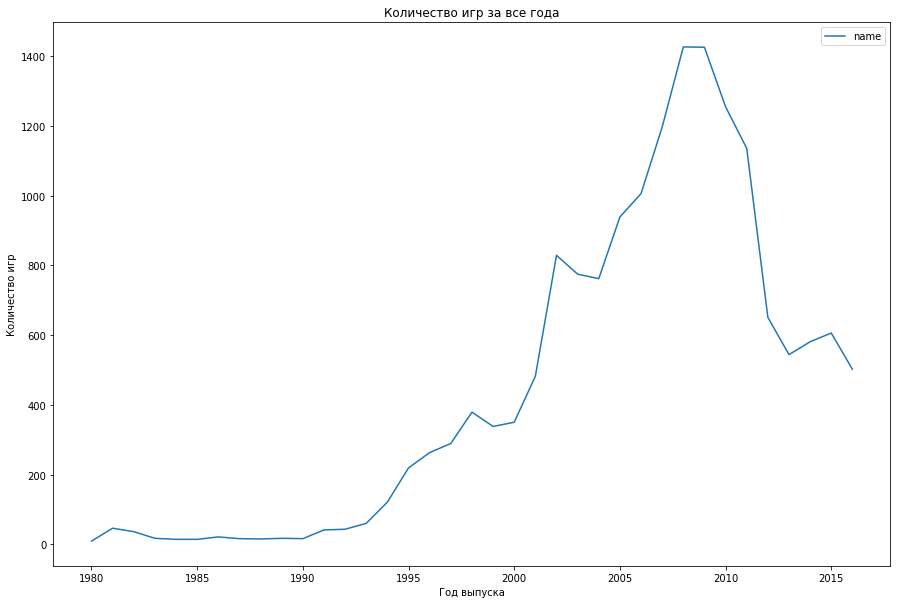

In [20]:
games_year_count = df.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')

plt.figure(figsize = (15,10))
sb.lineplot(data = games_year_count)
plt.title("Количество игр за все года")
plt.xlabel("Год выпуска")
plt.ylabel("Количество игр")
plt.show()

# Вывод

1. Из графика видно, что количество игр росло до 2008 года, а после заметен сильный спад выпуска игр, скорее всего это связано с тем, что мобильные приложения и мобильные игры начали набирать большую популярность и тем самым начали вытеснять индустрию компьютерных игр.

2. Для анализа данные за весь период не нужны, оставим те, которые отражают изменения последних лет (позже определим актуальный период).

### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

<AxesSubplot:ylabel='platform'>

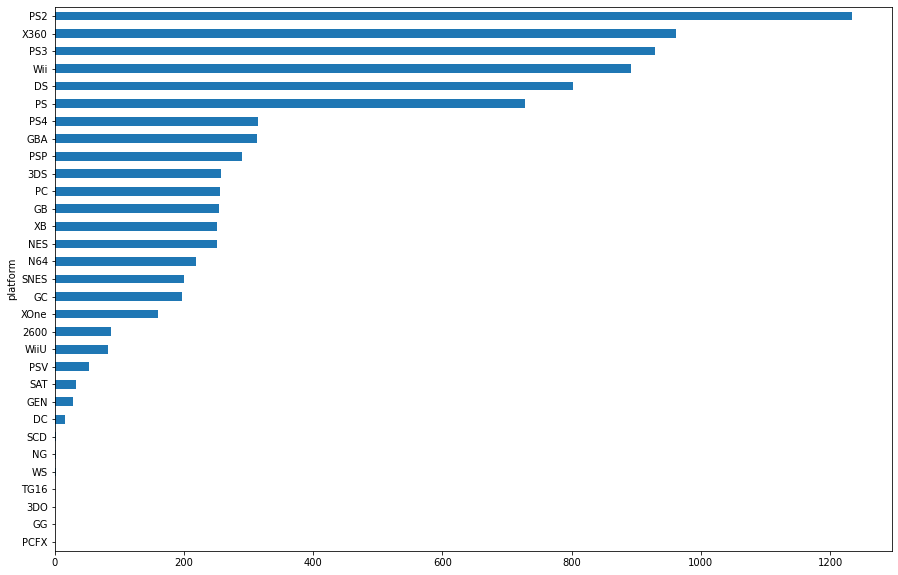

In [21]:
# Выведем продажи платформ за весь период
df_platform_sum = df.groupby('platform')['sum_sales'].sum().sort_values()
df_platform_sum.plot(kind = 'barh', y = 'sum_sales', figsize = (15, 10))

In [22]:
"""Функция для вывода топ 10 плафторм с определенного года year"""
def get_top_10_platform(year):
    # Вывод суммарных продаж по платформам с 2012
    df_platform_year = df.query("year_of_release >= @year").groupby('platform')['sum_sales'].sum().sort_values(ascending = False)
    # Занесем в список топ 10 платформ с 2012
    top_10_platform = df_platform_year.head(10).index.to_list()
    # Отфильтруем датасет для топ 10 платформ с 2012
    df_top_10_platform = df.query('year_of_release >= @year and platform in @top_10_platform')
    return df_top_10_platform

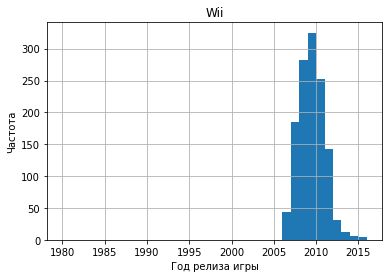

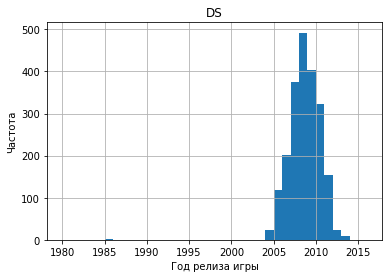

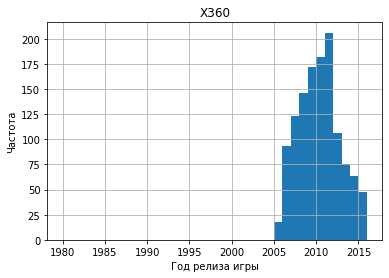

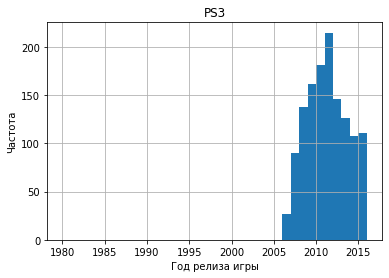

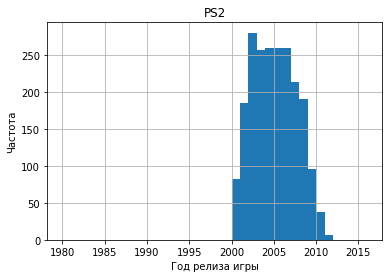

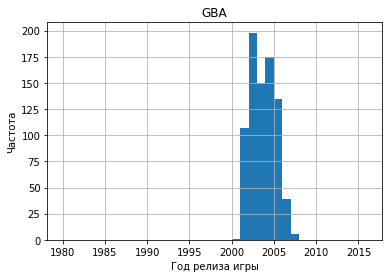

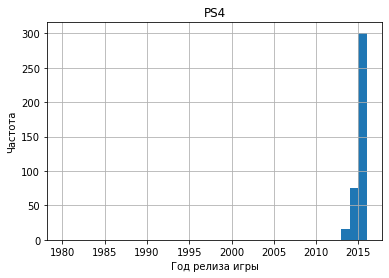

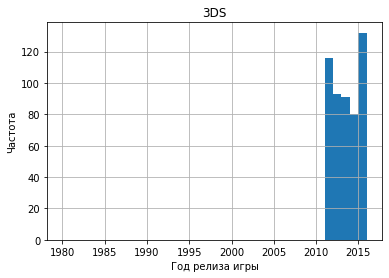

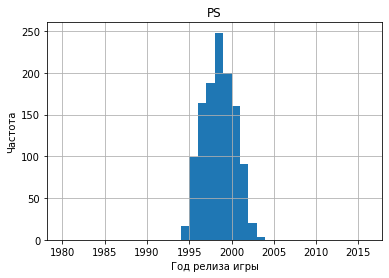

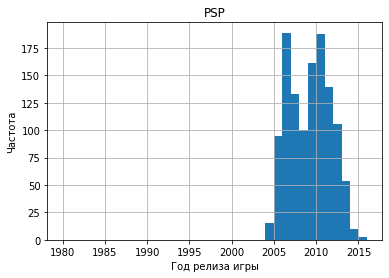

In [23]:
# Вывод графика

df_top_10_platform = get_top_10_platform(1980)
# Список платформ
platform_list = df_top_10_platform['platform'].unique()
# Список годов
years_list = [i for i in range(1980, 2017, 1)]

# Цикл для построения гистограмм:
for j in range(0, len(platform_list)):
    df_top_10_platform[df_top_10_platform['platform'] == platform_list[j]]\
    .plot(kind='hist', bins=years_list, legend=False, grid=True)
    
    plt.title(platform_list[j])
    plt.xlabel("Год релиза игры")
    plt.ylabel("Частота")

# Вывод

* PS - прожила с 1994 года до 2003 - 9 лет;
* PS2 - с 2000 до 2011 года - 11 лет;
* PS3 - с 2006 по настоящее время ещё существует - 10 лет;
* DS - вышла в 1985, потом данных нету, возможно это связано с тем, с 2004 года по 2013 год - 9 лет жизни;
* Wii - с 2006 по нынешний день, но в 2016 уже низкий пик -  10 лет.
* X360 - с 2005 и по настоящее время - 11 лет;
* GBA - с 2000-го года по 2007 год - получается 7 лет;
* PS4 - с 2013 по настоящее время - платформа сейчас находиться в самом расцвете;
* 3DS - с 2011 по настоящее время, период - 5 лет, но тоже находиться в самом пике;
* PSP - с 2004 по 2015, период - 11 лет;

Таким образом, средняя продолжительность существования платформы 10 лет. 

### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы.

Актуальным периодом являются года с 2012.

In [24]:
df_top_10_platform = get_top_10_platform(2012)

### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

<AxesSubplot:xlabel='platform', ylabel='sum_sales'>

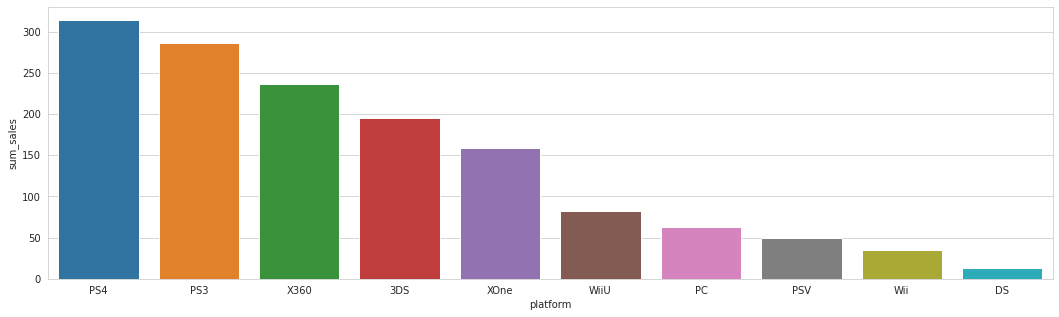

In [25]:
platfrom_prib = df_top_10_platform.pivot_table(index=['platform'], values='sum_sales', aggfunc='sum').reset_index().sort_values(by='sum_sales', ascending=False)
 
sb.set_style('whitegrid')
plt.figure(figsize=(18, 5))
sb.barplot(data = platfrom_prib, x='platform', y='sum_sales')

# Вывод

Наиболее прибыльные платформы с 2012 - PS4, PS3, X360. Количество продаж игр, выпущенных на каждую платформу, снижается. Таким образом, можно сказать, что весь рынок компьютерных игр падает

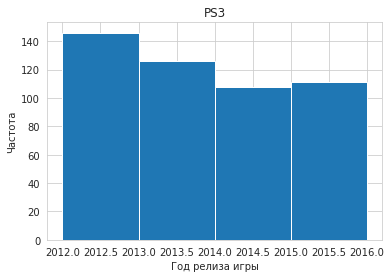

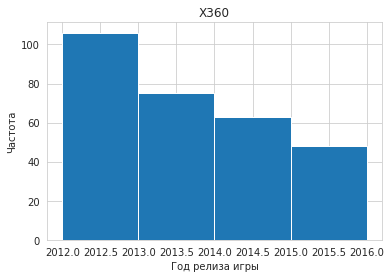

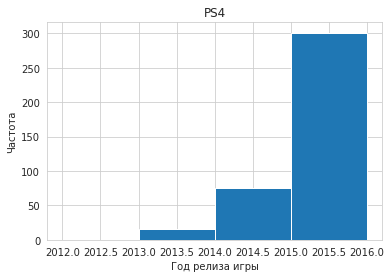

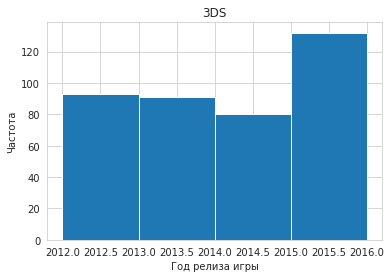

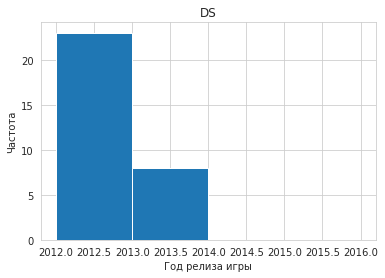

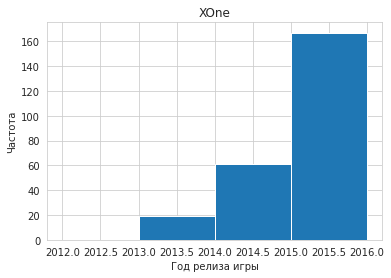

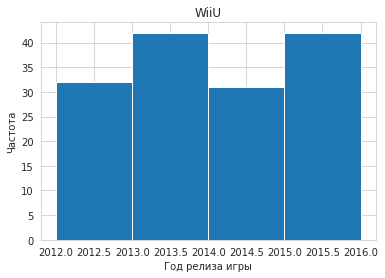

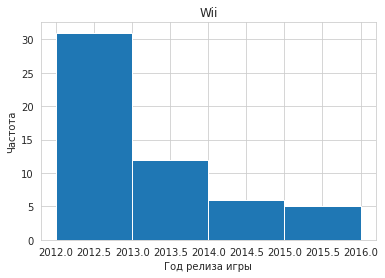

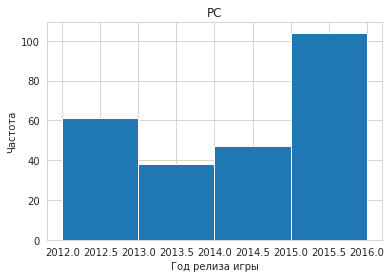

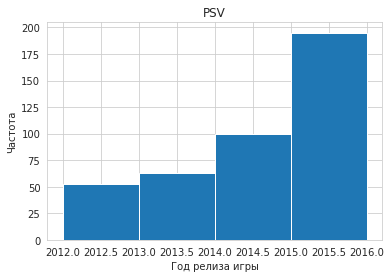

In [26]:
# Список годов
years_list = [i for i in range(2012, 2017, 1)]    
platform_list = df_top_10_platform['platform'].unique()

# Цикл для построения гистограмм:
for j in range(0, len(platform_list)):
    df_top_10_platform[df_top_10_platform['platform'] == platform_list[j]]\
    .plot(kind='hist', bins=years_list, legend=False, grid=True)
    
    plt.title(platform_list[j])
    plt.xlabel("Год релиза игры")
    plt.ylabel("Частота")

# Вывод

PC, PS4, PSV, XOne, WiiU, и 3DS - растущие плафтормы. 

Получается наиболее интересна платформа - это PS4, т.к она и растущая и самая прибыльная.

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

(0.0, 2.5)

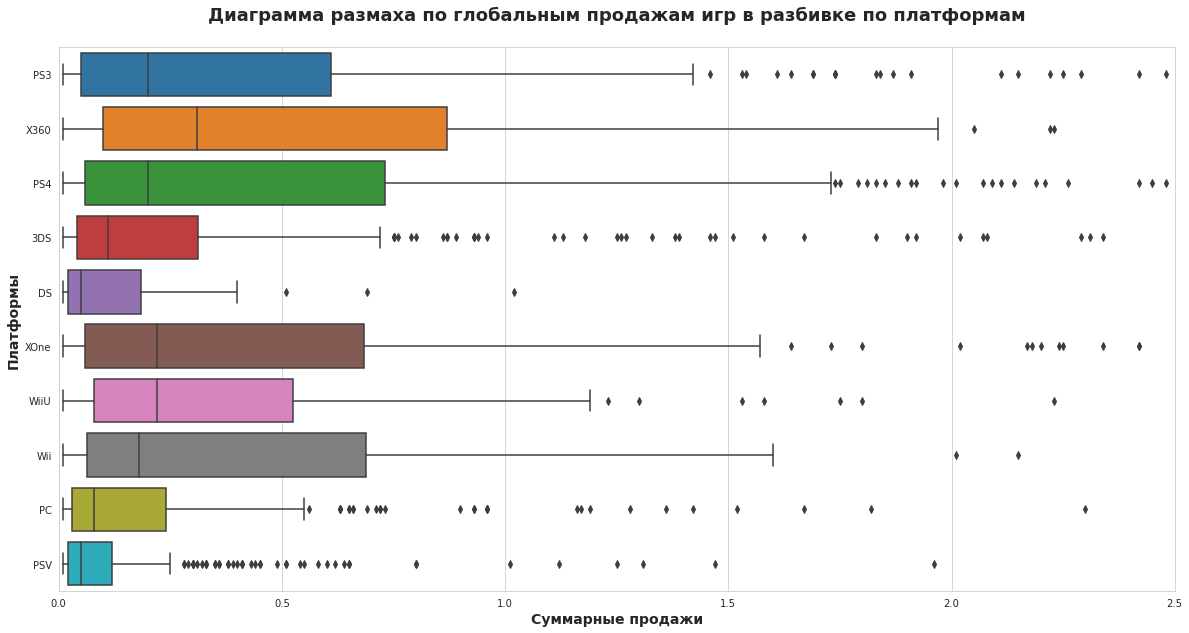

In [27]:
plt.figure(figsize=(20,10))
sb.boxplot(data = df_top_10_platform, x='sum_sales', y='platform')

plt.title(label='Диаграмма размаха по глобальным продажам игр в разбивке по платформам\n', fontsize=18, fontweight="bold")
plt.xlabel("Суммарные продажи", fontsize=14, fontweight="bold")
plt.ylabel("Платформы", fontsize=14, fontweight="bold")
plt.xlim(0, 2.5)

# Вывод

1. Наибольшие медианные продажи у платформ X360 и PS4;
2. Почти у всех платформ есть много выбросов;
3. Платформа PSV - самая неприбыльная;
4. Медиана у всех платформ разная.

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [28]:
"""Функция для вывода диаграммы рассеивания и подсчета корреляции по полям columns"""
def calculate_corr(platform, columns):
    print(f"Платформа {platform}")
    df_platform = df_top_10_platform.query("platform == @platform")
    # Диаграмма рассеяния для platform
    sb.pairplot(df_platform[columns])
    plt.show()
    # Посчитаем корреляцию
    platform_corr = df_platform[columns].corr()
    display(platform_corr)

Платформа X360


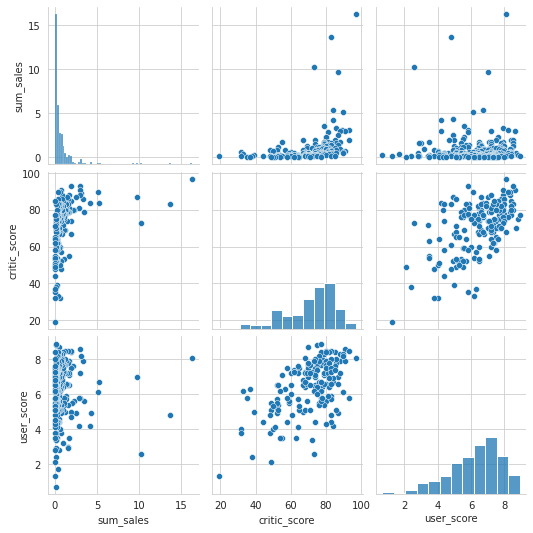

,sum_sales,critic_score,user_score
sum_sales,1.000000,0.360573,0.006164
critic_score,0.360573,1.000000,0.557352
user_score,0.006164,0.557352,1.000000


In [29]:
calculate_corr('X360', ['sum_sales', 'critic_score', 'user_score'])

# Вывод

1. Игры с высокими оценками продаются немного лучше;
2. По пользовательским оценкам есть игры, которые продаются не так хорошо, но имеют высокую оценку пользователей
3. Корреляция между sum_sales и critic_score равна 0.4.
4. Корреляции между sum_sales и user_score почти нет.

### Соотнесите выводы с продажами игр на других платформах.

Платформа PS4


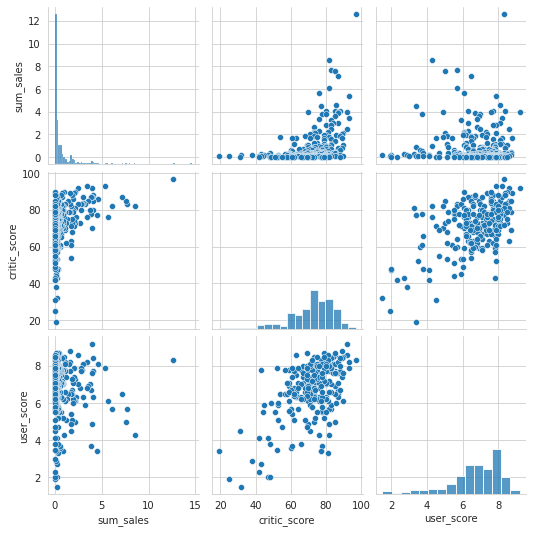

,sum_sales,critic_score,user_score
sum_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


Платформа PS3


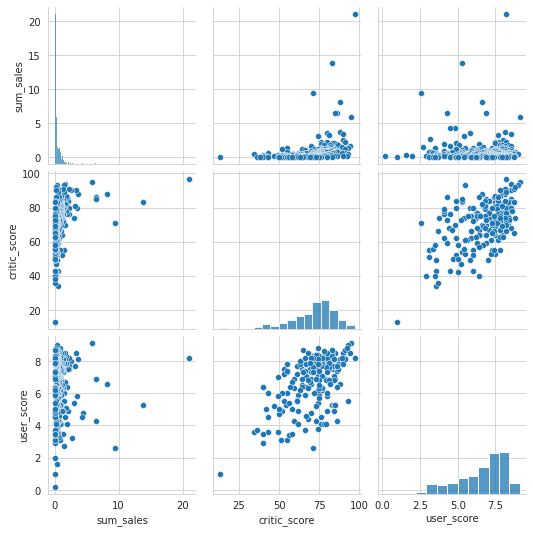

,sum_sales,critic_score,user_score
sum_sales,1.000000,0.332059,-0.004158
critic_score,0.332059,1.000000,0.549647
user_score,-0.004158,0.549647,1.000000


Платформа Wii


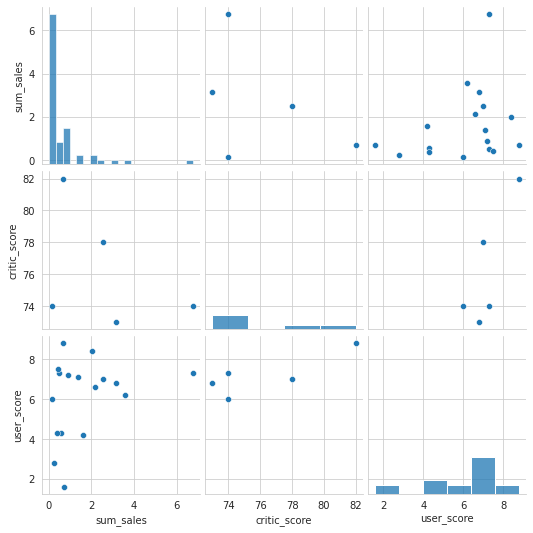

,sum_sales,critic_score,user_score
sum_sales,1.000000,-0.424341,0.296197
critic_score,-0.424341,1.000000,0.816295
user_score,0.296197,0.816295,1.000000


In [30]:
calculate_corr('PS4', ['sum_sales', 'critic_score', 'user_score'])
calculate_corr('PS3', ['sum_sales', 'critic_score', 'user_score'])
calculate_corr('Wii', ['sum_sales', 'critic_score', 'user_score'])

# Вывод

По графикам рассеяния можно сделать вывод:
1. Чем больше оценка критиков, тем больше продажи.
2. Зависимость продаж от оценок пользователей менее выраженная.

В целом коэффициент корреляции показывает, что зависимость продаж от оценок критиков сильнее, чем от оценок пользователей, кроме платформы Wii, где коэффициент корреляции примерно одинаковый.

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [31]:
# Посчитаем продажи по жанрам и отсортируем по убыванию 
def get_genre_statistic(type_arg):
    df_genre = df.pivot_table(
        index='genre', values='sum_sales', aggfunc=type_arg).sort_values(by='sum_sales', ascending=False)
    df_genre = df_genre.reset_index().rename_axis(None, axis=1)
    
    # Выведем график
    plt.figure(figsize=(12,6))
    sb.barplot(data = df_genre, x='genre', y='sum_sales')
    plt.xlabel('Жанры',fontsize=12)
    plt.ylabel('Продажи',fontsize=12)

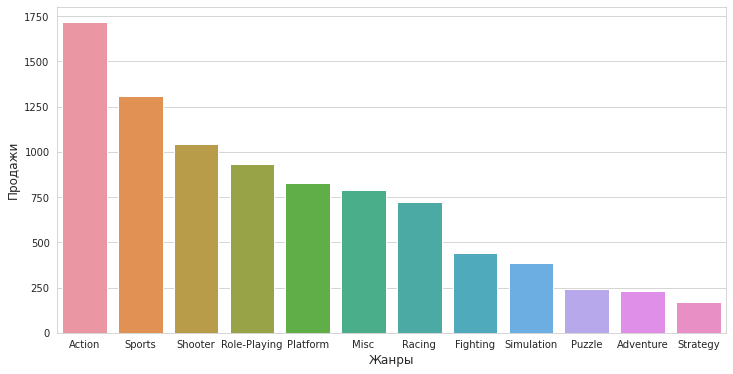

In [32]:
# Анализируем сумму продаж
get_genre_statistic('sum')

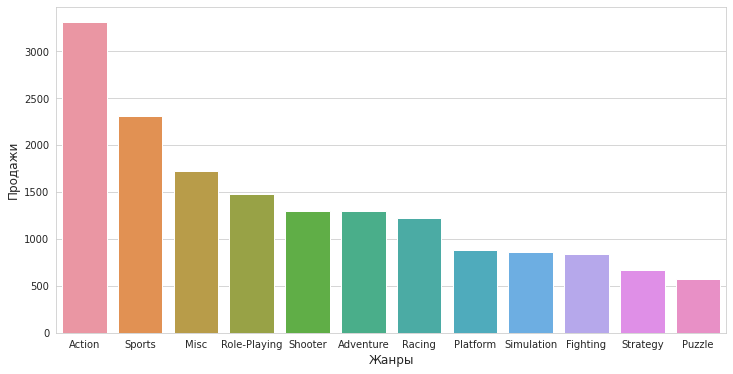

In [33]:
# Анализируем количество продаж
get_genre_statistic('count')

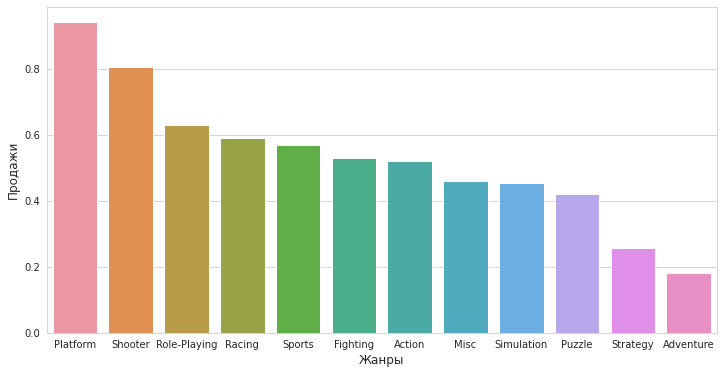

In [34]:
get_genre_statistic('mean')

# Вывод

- Лучше всего продаются жанры Action. На последнем месте - Strategy.
- Что касается выручки от продаж, то тут можно сказать, что самым высоким является жанр platform. А вот самый продаваемый жанр Action ниже. Меньше всего выручки у жанра Adventure.

## Составление портрета пользователя для каждого региона

### Определение для пользователя каждого региона (NA, EU, JP):

####  Самые популярные платформы (топ-5). Опишите различия в долях продаж.

In [35]:
def top_in_regions_plot(column, region_sales):
    """
    params: 
        column - Поле для группировки
        region_sales - Регион
    """
    df_grouped = df.groupby(column).agg({region_sales: 'sum'}).sort_values(by = region_sales, ascending=False)[:5]
    plot = df_grouped.plot(kind = 'bar', ec ='black', fontsize=18, rot = 20)
    plot.legend(prop={'size':17})
    plot.set_xlabel('')
    plot.title.set_size(20)

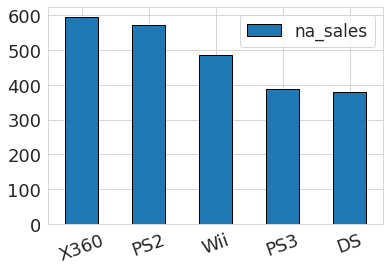

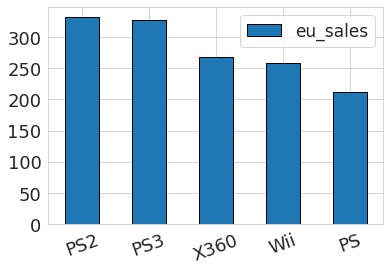

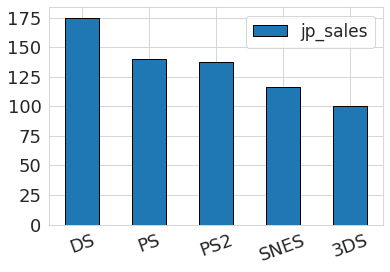

In [36]:
top_in_regions_plot('platform', 'na_sales')
top_in_regions_plot('platform', 'eu_sales')
top_in_regions_plot('platform', 'jp_sales')

# Вывод

- В Северной Америке самую большую популярность имеют платформы X360 и PS2;
- Платформы PS2 и PS3 находятся на примерно одинаковом уровне по популярности - это продажи в Европе;
- В Японии наиболее популярна платформа DS, остальные PS, PS2, SNES, 3DS следуют за ней.

#### Самые популярные жанры (топ-5). Поясните разницу.

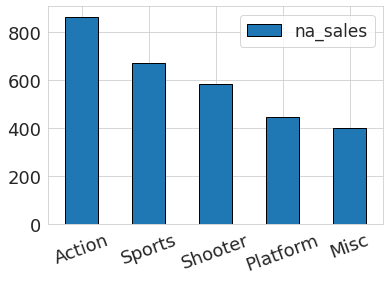

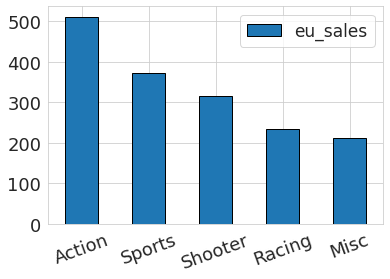

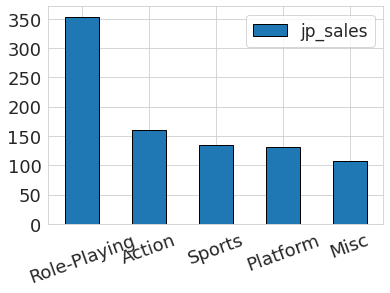

In [37]:
top_in_regions_plot('genre', 'na_sales')
top_in_regions_plot('genre', 'eu_sales')
top_in_regions_plot('genre', 'jp_sales')

# Вывод

- В Северной Америке и в Европе вкусы жанров почти одинаковы, отличается лишь 4 место. В Европе больше предпочитают Racing, нежели Platform;
- В Японии заметно лидирует (по сравнению с остальными) жанр Role_Playing, дальше идут Action И Sports;

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

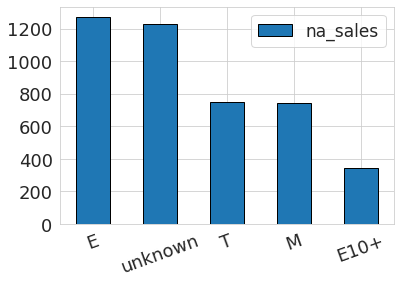

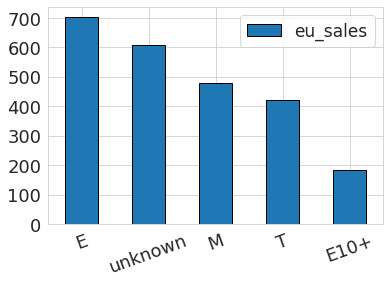

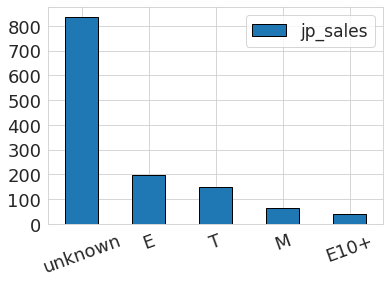

In [38]:
top_in_regions_plot('rating', 'na_sales')
top_in_regions_plot('rating', 'eu_sales')
top_in_regions_plot('rating', 'jp_sales')

Рейтинг от организации ESRB:
- «EC» («Early childhood») — Ориентирован на дошкольную аудиторию;
- «E» («Everyone») — Подходит для всех возрастов;
- «E10+» («Everyone 10 and older») — Подходит для детей от 10 лет и старше;
- «T» («Teen») — подходит для детей в возрасте 13 лет и старше (подросткам);
- «M» («Mature») — Подходит для детей в возрасте 17 лет и старше;  
- «RP» («Rating Pending») — Рейтинг в ожидании;
- «K-A» - Для детей – для тех, кто уже научился говорить и держать джойстик.

# Вывод

- В Северной Америке и в Европе лидируют игры "Для всех возрастов", второе место занимают игры без рейтинга;
- В Северной Америке 3 и 4 место почти поровну - с рейтингом "13 лет и старше (подросткам)" и "17 лет и старше".
- В Европе рейтинг "17 лет и старше" преобладает над "13 лет и старше (подросткам)";
- В Японии лидирует игры без рейтинга;
- Во всех трех регионах на последнем месте находится рейтинг "Подходит для детей от 10 лет и старше".

## Проверка гипотез

> 1 гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Пороговое значение alpha  = 0.05

Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC различаются .

In [39]:
alpha = .05 # критический уровень статистической значимости

xbox_hyp = df.query("platform == 'XOne' and year_of_release > 2006")['user_score'].dropna()
pc_hyp = df.query("platform == 'PC' and year_of_release > 2006")['user_score'].dropna()

results = st.ttest_ind(
    xbox_hyp, 
    pc_hyp)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.05554752084307562
Не получилось отвергнуть нулевую гипотезу


# Вывод

Не получилось отвергнуть нулевую гипотезу. Альтернативная гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC различаются - отвергаются.

> 2 гипотеза: средние пользовательские рейтинги жанров Action и Sports разные.

Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports равны.

Альтернативная  гипотеза: средние пользовательские рейтинги жанров Action и Sports разные.

In [40]:
alpha = .05 

action_hyp = df.query("genre == 'Action' and year_of_release > 2006")['user_score'].dropna()
sports_hyp = df.query("genre == 'Sports' and year_of_release > 2006")['user_score'].dropna()

results = st.ttest_ind(
    action_hyp, 
    sports_hyp)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.5342087924962316e-12
Отвергаем нулевую гипотезу


# Вывод

По результату видно, что нулевая гипотеза отвергается, а значит мы не отвергаем вторую гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные.

## Общий вывод

- Характерный срок жизни платформы - 10 лет, поэтому определили актуальный период с 2006 по 2016 год, т.к. в этом периоде представлены данные по самым популярным играм;
- Потенциально прибыльных платформ - это X360, PS3, Wii. Количество продаж игр, выпущенных на каждую платформу, снижается;
- Наибольшие медианные продажи у платформ X360 и PS3;
- Игры с высокими оценками критиков хорошо продаются, однако зависимость продаж от оценок пользователей менее выраженная;
- Самый популярный жанр за все время это Action, на последнем месте Strategy;
- В Северной Америке и в Европе вкусы жанров почти одинаковы, лидирует жанр Action, а в Японии заметно лидирует (по сравнению с остальными) жанр Role_Playing.
- В Северной Америке самую большую популярность у платформы X360, в Европе платформы PS2 и PS3 находятся на примерно одинаковом уровне по популярности, в Японии наиболее популярна платформа DS;
- Во всех регионах лидируют игры с рейтингом "Для всех возрастов";
- 1 гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые - подтвердилась;
- 2 гипотеза о том. что средние пользовательские рейтинги жанров Action и Sports разные - подтвердилась;